In [5]:
import os
from os.path import join, basename
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from tqdm.notebook import tqdm
import numpy as np
from scipy import interpolate
import warnings
warnings.filterwarnings("ignore")


# Parallel second loop schedule

In [6]:
Gabi = True
if Gabi:
    df_original = pd.read_csv(r"C:\Users\mgabi\Documents\terceiro ano\paralela\Trabalho\PPGraficos\data\parallel_2_loop_schedule.csv")
else:
    df_original = pd.read_csv("/home/acujl/Desktop/PPGraficos/data/parallel_2_loop_schedule.csv")
df_original.columns = ["threads", "len_vector", "num_buckets", "execution_time"]

# Drop rows with duplicates on threads, len_vector and num_buckets
df_original = df_original.drop_duplicates(subset=["threads", "len_vector", "num_buckets"])

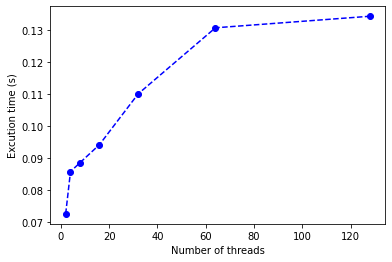

Text(0, 0.5, 'Speedup')

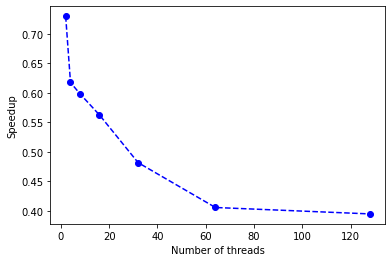

In [89]:
df = df_original[df_original["num_buckets"] == 10]
dff = df[df["len_vector"]==100000]

plt.plot(dff.threads,dff.execution_time,'--bo')
plt.xlabel('Number of threads')
plt.ylabel('Excution time (s)')
plt.show()
tempo_seq =5.30E-02
plt.plot(dff.threads,tempo_seq/dff.execution_time,'--bo')
plt.xlabel('Number of threads')
plt.ylabel('Speedup')
##plt.yscale('log') 

# Parallel second loop omp

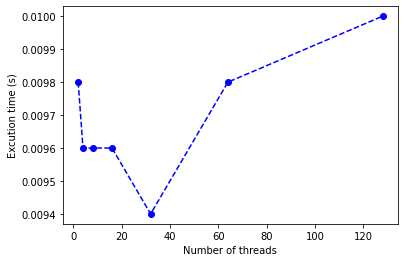

Text(0, 0.5, 'Speedup')

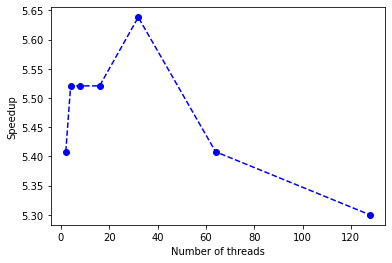

In [91]:
Gabi = True
if Gabi:
    df_original = pd.read_csv(r"C:\Users\mgabi\Documents\terceiro ano\paralela\Trabalho\PPGraficos\data\parallel_2_loop_omp.csv")
else:
    df_original = pd.read_csv("/home/acujl/Desktop/PPGraficos/data/parallel_2_loop_schedule.csv")
df_original.columns = ["threads", "len_vector", "num_buckets", "execution_time"]

# Drop rows with duplicates on threads, len_vector and num_buckets
df_original = df_original.drop_duplicates(subset=["threads", "len_vector", "num_buckets"])

df = df_original[df_original["num_buckets"] == 10]
dff = df[df["len_vector"]==100000]

plt.plot(dff.threads,dff.execution_time,'--bo')
plt.xlabel('Number of threads')
plt.ylabel('Excution time (s)')
plt.show()
tempo_seq =5.30E-02
plt.plot(dff.threads,tempo_seq/dff.execution_time,'--bo')
plt.xlabel('Number of threads')
plt.ylabel('Speedup')
##plt.yscale('log') 

# Parallel first loop 

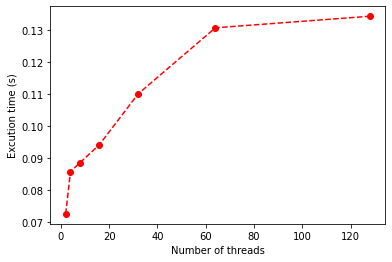

Text(0, 0.5, 'Speedup')

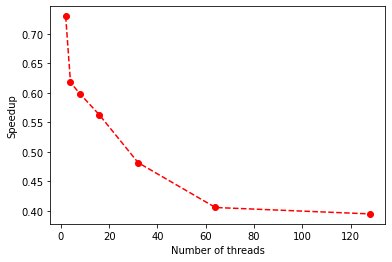

In [92]:
Gabi = True
if Gabi:
    df_original = pd.read_csv(r"C:\Users\mgabi\Documents\terceiro ano\paralela\Trabalho\PPGraficos\data\parallel_1_loop.csv")
else:
    df_original = pd.read_csv("/home/acujl/Desktop/PPGraficos/data/parallel_2_loop_schedule.csv")
df_original.columns = ["threads", "len_vector", "num_buckets", "execution_time"]

# Drop rows with duplicates on threads, len_vector and num_buckets
df_original = df_original.drop_duplicates(subset=["threads", "len_vector", "num_buckets"])

df = df_original[df_original["num_buckets"] == 10]
dff = df[df["len_vector"]==100000]


plt.plot(dff.threads,dff.execution_time,'--ro')
plt.xlabel('Number of threads')
plt.ylabel('Excution time (s)')
plt.show()
tempo_seq =5.30E-02
plt.plot(dff.threads,tempo_seq/dff.execution_time,'--ro')
plt.xlabel('Number of threads')
plt.ylabel('Speedup')

# Parallel third loop

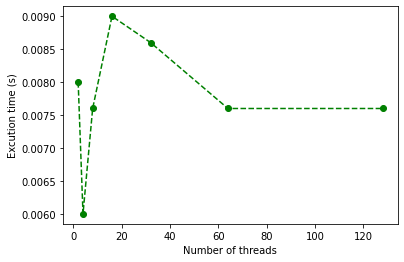

Text(0, 0.5, 'Speedup')

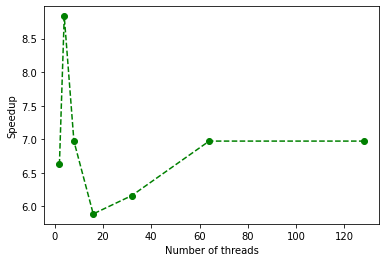

In [93]:
Gabi = True
if Gabi:
    df_original = pd.read_csv(r"C:\Users\mgabi\Documents\terceiro ano\paralela\Trabalho\PPGraficos\data\parallel_3_loop.csv")
else:
    df_original = pd.read_csv("/home/acujl/Desktop/PPGraficos/data/parallel_2_loop_schedule.csv")
df_original.columns = ["threads", "len_vector", "num_buckets", "execution_time"]

# Drop rows with duplicates on threads, len_vector and num_buckets
df_original = df_original.drop_duplicates(subset=["threads", "len_vector", "num_buckets"])

df = df_original[df_original["num_buckets"] == 10]
dff = df[df["len_vector"]==100000]

plt.plot(dff.threads,dff.execution_time,'--go')
plt.xlabel('Number of threads')
plt.ylabel('Excution time (s)')
plt.show()
tempo_seq =5.30E-02
plt.plot(dff.threads,tempo_seq/dff.execution_time,'--go')
plt.xlabel('Number of threads')
plt.ylabel('Speedup')

# Parallel quicksort

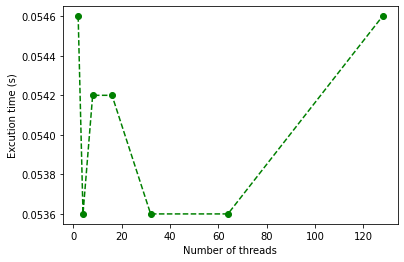

Text(0, 0.5, 'Speedup')

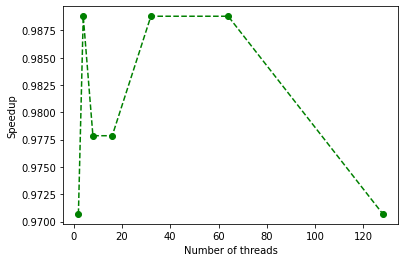

In [94]:
# a tua versão
Gabi = True
if Gabi:
    df_original = pd.read_csv(r"C:\Users\mgabi\Documents\terceiro ano\paralela\Trabalho\PPGraficos\data\parallel_quicksort.csv")
else:
    df_original = pd.read_csv("/home/acujl/Desktop/PPGraficos/data/parallel_2_loop_schedule.csv")
df_original.columns = ["threads", "len_vector", "num_buckets", "execution_time"]

# Drop rows with duplicates on threads, len_vector and num_buckets
df_original = df_original.drop_duplicates(subset=["threads", "len_vector", "num_buckets"])

df = df_original[df_original["num_buckets"] == 10]
dff = df[df["len_vector"]==100000]

plt.plot(dff.threads,dff.execution_time,'--go')
plt.xlabel('Number of threads')
plt.ylabel('Excution time (s)')
plt.show()
tempo_seq =5.30E-02
plt.plot(dff.threads,tempo_seq/dff.execution_time,'--go')
plt.xlabel('Number of threads')
plt.ylabel('Speedup')

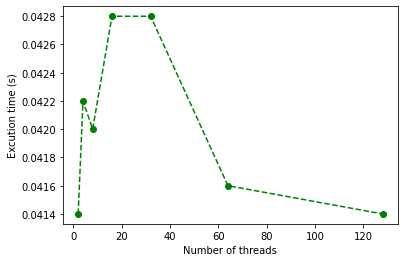

Text(0, 0.5, 'Speedup')

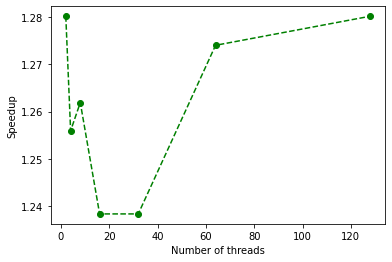

In [97]:

# pragma dentro da função e não na chamada - como o stor sem o single na segunda task
Gabi = True
if Gabi:
    df_original = pd.read_csv(r"C:\Users\mgabi\Documents\terceiro ano\paralela\Trabalho\PPGraficos\data\parallel_quicksort2.csv")
else:
    df_original = pd.read_csv("/home/acujl/Desktop/PPGraficos/data/parallel_2_loop_schedule.csv")
df_original.columns = ["threads", "len_vector", "num_buckets", "execution_time"]

# Drop rows with duplicates on threads, len_vector and num_buckets
df_original = df_original.drop_duplicates(subset=["threads", "len_vector", "num_buckets"])

df = df_original[df_original["num_buckets"] == 10]
dff = df[df["len_vector"]==100000]

plt.plot(dff.threads,dff.execution_time,'--go')
plt.xlabel('Number of threads')
plt.ylabel('Excution time (s)')
plt.show()
tempo_seq =5.30E-02
plt.plot(dff.threads,tempo_seq/dff.execution_time,'--go')
plt.xlabel('Number of threads')
plt.ylabel('Speedup')

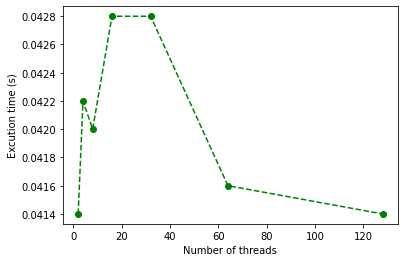

Text(0, 0.5, 'Speedup')

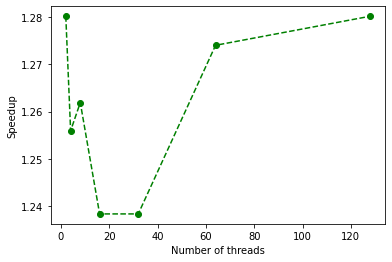

In [98]:
# codigo que esta la mas sem comment no quick 2
Gabi = True
if Gabi:
    df_original = pd.read_csv(r"C:\Users\mgabi\Documents\terceiro ano\paralela\Trabalho\PPGraficos\data\quick3.csv")
else:
    df_original = pd.read_csv("/home/acujl/Desktop/PPGraficos/data/parallel_2_loop_schedule.csv")
df_original.columns = ["threads", "len_vector", "num_buckets", "execution_time"]

# Drop rows with duplicates on threads, len_vector and num_buckets
df_original = df_original.drop_duplicates(subset=["threads", "len_vector", "num_buckets"])

df = df_original[df_original["num_buckets"] == 10]
dff = df[df["len_vector"]==100000]

plt.plot(dff.threads,dff.execution_time,'--go')
plt.xlabel('Number of threads')
plt.ylabel('Excution time (s)')
plt.show()
tempo_seq =5.30E-02
plt.plot(dff.threads,tempo_seq/dff.execution_time,'--go')
plt.xlabel('Number of threads')
plt.ylabel('Speedup')